<a target="_blank" href="https://colab.research.google.com/github/avakanski/Fall-2022-Python-Programming-for-Data-Science/blob/main/Lectures/Theme%203%20-%20Model%20Engineering%20Pipelines/Lecture%2020%20-%20Language%20Models%20with%20Hugging%20Face/Lecture%2020%20-%20Language%20Models%20with%20Hugging%20Face.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<a name='section0'></a>
# Lecture 20 Language Models with Hugging Face

- [20.1 Introduction to Hugging Face](#section1)
- [20.2 Hugging Face Pipelines](#section2)
- [20.3 Pipelines for NLP Tasks](#section3)
    - [20.3.1 Text Generation](#section3-1)
    - [20.3.2 Question Answering](#section3-2)
    - [20.3.3 Sentiment Analysis](#section3-3)
    - [20.3.4 Text Summarization](#section3-4)
    - [20.3.5 Machine Translation](#section3-5)
    - [20.3.6 Named Entity Recognition](#section3-6)
    - [20.3.7 Zero-shot Classification](#section3-7)
    - [20.3.8 Mask Filling](#section3-8)
- [20.4 Tokenizers](#section4) 
- [20.5 Datasets](#section5)    
- [References](#section10)





<a name='section1'></a>

# 20.1 Introduction to Hugging Face

***Hugging Face*** [link](https://huggingface.co/) is a platform for Machine Learning and AI created in 2016. Its aim is to "build, train and deploy state of the art models powered by the reference open source in machine learning". Since then, Hugging Face has established itself as a the main resource for NLP, providing open-source access to over 20,000 pre-trained models, datasets, and other tools and resources. Hugging Face focuses on community-building around open-source machine learning tools and data, and they also developed a [course](https://huggingface.co/course/chapter1/1) on how to use their resources for various tasks. Also note that while open access is provided to the core NLP libraries, Hugging Face also offers tiered pricing options for access to AutoNLP capabilities and an accelerated inference API.

<img src='https://raw.githubusercontent.com/avakanski/Fall-2022-Python-Programming-for-Data-Science/main/Lectures/Theme%203%20-%20Model%20Engineering%20Pipelines/Lecture%2020%20-%20Language%20Models%20with%20Hugging%20Face/imges/hf_icon.png' width=400px/>


Hugging Face intitially focused on transformer models and NLP, while recently they have expanded their libraries and tools to cover generally machine learning models and many other tasks. State-of-the-art Transformer Networks are very large models, hence, training such models from scratch is very
expensive and not affordable for many organizations. Providing access to pre-trained models for transfer learning and fine-tuning to specific tasks by Hugging Face has been a significant recourse.


The core Hugging Face libraries include Transformer models, Tokenizers, Datasets, and Accelerate. The Accelerate library enables distributed training with hardware acceleration devices, such using multiple GPUs, or a cloud accelerator with TPUs. In addition to these core libraries, Hugging Face provides various community resources, e.g., tools for sharing models, code versioning, Spaces allows to share apps developed with Hugging Face libraries and browse apps crated by others, etc. 

<img src='https://raw.githubusercontent.com/avakanski/Fall-2022-Python-Programming-for-Data-Science/main/Lectures/Theme%203%20-%20Model%20Engineering%20Pipelines/Lecture%2020%20-%20Language%20Models%20with%20Hugging%20Face/imges/hf_libraries.png' width=400px/>


The characteristics of these libraries include:
- Ease of use and simplicity, where dowloading and using state-of-the-art NLP models can be done with a few lines of code.
- Flexibility, since all models are implemented either using the `nn.Module` in PyTorch or `tf.keras.Model` in TensorFlow, which allows easy intergration of the models with these popular frameworks.


<a name='section2'></a>

# 20.2 Hugging Face Pipelines

Hugging Face uses ***Pipelines*** as an easy-to-use API, which through the `pipeline()` method allow performing inference over a variety of tasks.

The pipeline() method has the following syntax: 

```
from transformers import pipeline

# Pipeline to use a default model & tokenizer for a given task
pipeline("<task-name>")

# Pipeline to use an existing model
pipeline("<task-name>", model="<model_name>")

# Pipeline to use a custom model/tokenizer
pipeline('<task-name>', model='<model name>',tokenizer='<tokenizer_name>')
```

Among the currently available task pipelines are:

- text-generation
- question-answering
- sentiment-analysis
- summarization
- translation
- ner (named entity recognition)
- zero-shot-classification
- fill-mask

<a name='section3'></a>

# 20.3 Pipelines for NLP Tasks

In this section, we will examine examples on how to use the `pipeline("<task-name>")` method with different NLP tasks. As we mentioned, if we don't provide the names for the used model and tokenizer, the pipeline will assign a default language model and tokenized to complete the task, and it will download the model parameters and other required elements to perform text generation.

To use the Transformer library by Hugging Face we will need to first first install it, since it is not preinstalled in Google Colab. 

In [66]:
!pip install transformers sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a name='section3-1'></a>

### 20.3.1 Text Generation

The first example will show how to use the `pipeline("<task-name>")` method fo generate text, based on a provided prompt. We will use the `"text-generation"` as task name. 

When the cell is exectued, the pipeline will select a default pretrained model for text generation in Enlish, it will download the model and all other required elements, and it will create a generator object. 

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


Now let’s provide a prompt text, and use the created generator model to continue the text. Note that text generation involves randomness, so some of outputs will not be perfect. 

In [ ]:
outputs_1 = generator("In this course, we will teach you how to")

print(outputs_1[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In this course, we will teach you how to solve these problems. These solutions are the backbone of any problem.

One thing is for certain, you shouldn't build a good game studio simply by choosing to build good games. You should build


In [ ]:
outputs_2 = generator("Niagara Falls is a city located in")

print(outputs_2[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Niagara Falls is a city located in northeast Ontario. It is situated along the banks of Niagara Lakes and includes 2 lakes as well as a large lakebed. The entire city was considered the pinnacle of architectural excellence from 1927-1931. The city


In [ ]:
outputs_3 = generator("Niagara Falls is a famous world attractation")

print(outputs_3[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1301: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


Niagara Falls is a famous world attractation. Visitors head to the gorge for a unique treat from the Buffalo River, with a waterfall filled with riverbonds covered with ice.

The New York State Parks and Recreation, for example, has


<a name='section3-2'></a>

### 20.3.2 Question Answering

This pipeline answers questions using information from a given context. Such pipeline can be very useful when we are dealing with long text data and finding answers to questions can take time. 

In [ ]:
question_answerer = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.7553666234016418, 'start': 0, 'end': 10, 'answer': 'The animal'}

We can provides inputs to the pipeline as a dictionary wioth question and context as keys. The model extracts information from the provided context. Also note that differently from the above example of text generation, the model does not generate new text to answer the question.

In [ ]:
input_1 = {
    "question": "What didn't cross the street?",
    "context" : "The animal didn't cross the street because it was too tired",
    }

question_answerer(input_1)

{'score': 0.7553666234016418, 'start': 0, 'end': 10, 'answer': 'The animal'}

In [ ]:
input_2 = {
    "question": "Why the animal didn't cross the street?",
    "context" : "The animal didn't cross the street because it was too wide",
    }

question_answerer(input_2)

{'score': 0.6076130867004395,
 'start': 43,
 'end': 58,
 'answer': 'it was too wide'}

<a name='section3-3'></a>

### 20.3.3 Sentiment Analysis

In [ ]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
classifier("I've been waiting for a HuggingFace course my whole life.")

[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

The pipeline allows to pass multiple sentences, and it will return a sentiment score for each sentence. 

In [ ]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

<a name='section3-4'></a>

### 20.3.4 Text Summarization

Text summarization reduces a longer text into a shorter summary.

In [ ]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)

[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

Specifying the `min_length` and `max_length` arguments allows to control the length of the summary. 

In [ ]:
summarizer(
    """
    Flooding on the Yangtze river remains serious although water levels on parts of the river decreased
    today, according to the state headquarters of flood control and drought relief .
    """, min_length=8, max_length=20)

[{'summary_text': ' Flooding on the Yangtze river remains serious although water levels on parts of the'}]

In [ ]:
summarizer(
    """BAGHDAD -- Archaeologists in northern Iraq last week unearthed 2,700-year-old rock carvings featuring war scenes and trees from the Assyrian Empire, an archaeologist said Wednesday.

    The carvings on marble slabs were discovered by a team of experts in Mosul, Iraq’s second-largest city, who have been working to restore the site of the ancient Mashki Gate, which was bulldozed by Islamic State group militants in 2016.

    Fadhil Mohammed, head of the restoration works, said the team was surprised by discovering “eight murals with inscriptions, decorative drawings and writings.”

    Mashki Gate was one of the largest gates of Nineveh, an ancient Assyrian city of this part of the historic region of Mesopotamia.

    The discovered carvings show, among other things, a fighter preparing to fire an arrow while others show palm trees.
    """)  

[{'summary_text': ' The carvings on marble slabs were discovered by a team of experts in Mosul, Iraq’s second-largest city . They have been working to restore the site of the ancient Mashki Gate, which was bulldozed by Islamic State group militants in 2016 . Mashki gate was one of the largest gates of Nineveh, an ancient Assyrian city of this part of Mesopotamia .'}]

<a name='section3-5'></a>

### 20.3.5 Machine Translation

For machine translation, we can provide source and target languages in the pipeline, as in the next cell where the task `"translation_en_to_fr"` is to translate text from English to French. Although this pipeline can work with several languages, most often, machine translation requires to specify the name of used language model.

In [ ]:
translator = pipeline("translation_en_to_fr")

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


In [ ]:
translator("I am a student")

[{'translation_text': 'Je suis un étudiant'}]

In [ ]:
translator("Peyton Manning became the first quarterback ever to lead two different teams to multiple Super Bowls.")

[{'translation_text': 'Peyton Manning est devenu le premier quarterback à conduire deux équipes différentes à plusieurs Super Bowls.'}]

<a name='section3-6'></a>

### 20.3.6 Named Entity Recognition

Named Entity Recognition (NER), also known as named entity tagging, is a task to identify parts of the input that represent entities. Examples of entities are:
- Location (LOC) 
- Organizations (ORG)
- Persons (PER)
- Miscellaneous entities (MISC)

In [ ]:
ner = pipeline("ner", grouped_entities=True)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/token_classification.py:136: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  "`grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to"


In [ ]:
text_1 = "Abraham Lincoln was a president who lived in the United States."

print(ner(text_1))

[{'entity_group': 'PER', 'score': 0.9988935, 'word': 'Abraham Lincoln', 'start': 0, 'end': 15}, {'entity_group': 'LOC', 'score': 0.99965084, 'word': 'United States', 'start': 49, 'end': 62}]


Or, we can use pandas to disply the output.

In [ ]:
import pandas as pd

pd.DataFrame(ner(text_1))

,entity_group,score,word,start,end
0,PER,0.998893,Abraham Lincoln,0,15
1,LOC,0.999651,United States,49,62


In [ ]:
text_2 = """BAGHDAD -- Archaeologists in northern Iraq last week unearthed 2,700-year-old rock carvings featuring war scenes and trees from the Assyrian Empire, an archaeologist said Wednesday.

    The carvings on marble slabs were discovered by a team of experts in Mosul, Iraq’s second-largest city, who have been working to restore the site of the ancient Mashki Gate, which was bulldozed by Islamic State group militants in 2016.

    Fadhil Mohammed, head of the restoration works, said the team was surprised by discovering “eight murals with inscriptions, decorative drawings and writings.”

    Mashki Gate was one of the largest gates of Nineveh, an ancient Assyrian city of this part of the historic region of Mesopotamia.

    The discovered carvings show, among other things, a fighter preparing to fire an arrow while others show palm trees.
    """

pd.DataFrame(ner(text_2))

,entity_group,score,word,start,end
0,LOC,0.434805,BA,0,2
1,LOC,0.999473,Iraq,38,42
2,MISC,0.893631,Assyrian,132,140
3,LOC,0.782092,Empire,141,147
4,LOC,0.999238,Mosul,256,261
5,LOC,0.999156,Iraq,263,267
6,LOC,0.971527,Mashki Gate,348,359
7,ORG,0.997262,Islamic State,384,397
8,PER,0.999300,Fadhil Mohammed,428,443
9,LOC,0.974939,Mashki Gate,592,603


<a name='section3-7'></a>

### 20.3.7 Zero-shot Classification

Zero-shot classification is a task to classify text documents. The term 
*zero-shot* classification refers to tasks for which a pretrained model has not been train. I.e., the model was not trained to classify documents using the provided type of labels.

In [ ]:
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

The pipeline allows us to list candidate labels to be used for the classification. For this example, the highest probability was assigned to the "sports" category. 

In [ ]:
classifier(
    "Peyton Manning became the first quarterback ever to lead two different teams to multiple Super Bowls.",
    candidate_labels=["education", "politics", "business", "sports"],
)

{'sequence': 'Peyton Manning became the first quarterback ever to lead two different teams to multiple Super Bowls.',
 'labels': ['sports', 'business', 'education', 'politics'],
 'scores': [0.9866245985031128,
  0.0067298333160579205,
  0.0034621735103428364,
  0.003183376044034958]}

<a name='section3-8'></a>

### 20.3.8 Mask Filling

The pipeline with the `fill-mask` task is used to fill in blanks in an input text. 

In [ ]:
mask_filling = pipeline("fill-mask")

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/331M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
mask_filling("Abraham Lincoln was a <mask> who lived in the United States.", top_k=5)

[{'score': 0.33272555470466614,
  'token': 3661,
  'token_str': ' Democrat',
  'sequence': 'Abraham Lincoln was a Democrat who lived in the United States.'},
 {'score': 0.18091009557247162,
  'token': 1172,
  'token_str': ' Republican',
  'sequence': 'Abraham Lincoln was a Republican who lived in the United States.'},
 {'score': 0.03390652686357498,
  'token': 16495,
  'token_str': ' Jew',
  'sequence': 'Abraham Lincoln was a Jew who lived in the United States.'},
 {'score': 0.028415359556674957,
  'token': 24156,
  'token_str': ' Presbyterian',
  'sequence': 'Abraham Lincoln was a Presbyterian who lived in the United States.'},
 {'score': 0.02462908811867237,
  'token': 11593,
  'token_str': ' physician',
  'sequence': 'Abraham Lincoln was a physician who lived in the United States.'}]

In [ ]:
mask_filling("Flooding on the Yangtze river remains serious although <mask> levels on parts of the river decreased today.", top_k=2)

[{'score': 0.24890871345996857,
  'token': 514,
  'token_str': ' water',
  'sequence': 'Flooding on the Yangtze river remains serious although water levels on parts of the river decreased today.'},
 {'score': 0.12597322463989258,
  'token': 11747,
  'token_str': ' oxygen',
  'sequence': 'Flooding on the Yangtze river remains serious although oxygen levels on parts of the river decreased today.'}]

<a name='section4'></a>

# 20.4 Tokenizers


Tokenizer libraries in Hugging Face are used to split the input text data into tokens (e.g., words, characters, N-grams), and map the tokens to integers. When we use a pretrained model from Hugging Face for a downstream task, our text data needs to be preprocessed in the same way as the training data used with the model. Therfore, we will need to download the tokenizer for that specific model.

Let's consider the model `"distilbert-base-uncased"`, which is a version of the BERT transformer model, which takes case-insensitive English test as input data. Next, we will download the tokenizer for this model by using the `AutoTokenizer` class and its method `from_pretrained()`. 

In [67]:
from transformers import AutoTokenizer

model = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)

Let's now use the tokenizer to convert the sentence into a sequence of integers, and display the output.

The ouput of the tokenizer is a dictionary consisting of two keys-valuees pairs:
- `input_ids`, a list of integers, where each index identifies a token. The indexing is based on the vocabulary of the training data that was used to train the model `"distilbert-base-uncased"`.
- `attention_mask`, a list of 1 or 0, to indicate padding of the text sequence. This sentence does not have padding, since all elements have an attention mask 1. 

In [ ]:
output_tokens_1 = tokenizer('Tokenizing text is easy.')
print(output_tokens_1)

{'input_ids': [101, 19204, 6026, 3793, 2003, 3733, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


One thing to note is that the output has 8 tokens, although the input sentence has 4 words + the period mark. To understand better how the tokenization was performed, in the next cell, we used the method `covert_ids_to_tokens()` to obain the text for each token. Now we can see that the tokenizer places special tokens at the beginning and end of each sequence. `[CLS]` is placed at the beginning (it stands for Classification), and `[SEP]` is placed at the end of the sequence.

Also note that the gerund veb "tokenizining" is split into `'token'` and `'##izing'`. Using two tokens for the word allows to work with smaller vocabularies. I.e., instead of considering `token` and `tokenization` as two different words, by spliting the word into the root `token` and the suffix `ization`, the model will use two tokens that have a distinct semantic meaning. This approach of decomposing long words into subwords is especially efficient with some languages where one can form very long words by chaining simple subwords.

In [ ]:
tokenizer.convert_ids_to_tokens(output_tokens_1.input_ids)

['[CLS]', 'token', '##izing', 'text', 'is', 'easy', '.', '[SEP]']

Most tokenizers in Hugging Face have the special tokens between 100 and 103. Most Hugging Face tokenizers use this approximate range for special tokens. 

These special tokens are:
- \[PAD\], padding.
- \[UNK\], unknown token.
- \[CLS\], sequence beginning.
- \[SEP\], sequence end.
- \[MASK\], masked tokens. 

In [ ]:
tokenizer.convert_ids_to_tokens([0, 100, 101, 102, 103])

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]']

One more simple example is provided next. We can see that the word 'Transformer' is tokenized as 'transform' + '##er'.

In [70]:
output_tokens_2 = tokenizer('Using a Transformer network in Hugging Face is simple')
print(output_tokens_2)

{'input_ids': [101, 2478, 1037, 10938, 2121, 2897, 1999, 17662, 2227, 2003, 3722, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [71]:
tokenizer.convert_ids_to_tokens(output_tokens_2.input_ids)

['[CLS]',
 'using',
 'a',
 'transform',
 '##er',
 'network',
 'in',
 'hugging',
 'face',
 'is',
 'simple',
 '[SEP]']

Tokenizers can be applied to multiple text documents. The argument `padding=True` is used to pad the sequences to the longest sequence. Note below that 0 tokens are added to pad the second sentence.

In [74]:
text_3 =  ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]

output_tokens_3 = tokenizer(text_3, padding=True)

In [75]:
print(output_tokens_3)

{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], [101, 1045, 5223, 2023, 2061, 2172, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [76]:
print("Input IDs")
for item in output_tokens_3.input_ids:
    print(item)

print("Attention Mask")
for item in output_tokens_3.attention_mask:
    print(item)

Input IDs
[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
[101, 1045, 5223, 2023, 2061, 2172, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


Note that each sequence of tokens begins with the token 101 ('[CLS]') and ends with the token 102 ('[SEP]').

If `max_length` is provided, the tokenizer will truncate longer sentences to the length of the sequence of tokens, as in the example in the next cell.

In [85]:
output_tokens_4 = tokenizer(text_3, padding=False, max_length=10)

print("Input IDs")
for item in output_tokens_4.input_ids:
    print(item)

print("Attention Mask")
for item in output_tokens_4.attention_mask:
    print(item)

Input IDs
[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 102]
[101, 1045, 5223, 2023, 2061, 2172, 999, 102]
Attention Mask
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]


The Tokenizers library also allow to train new tokenizers from scratch. For instance, if a large corpus of text is available in another language than English, a new tokenizer will need to be trained, to efficiently deal with the differences in the punctuation and use of spaces in that language.

<a name='section5'></a>

# 20.5 Datasets

Hugging Face provides access to a large number of datasets. To use the datasets, we need to instal the library. 

In [87]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To see all available datasets in Hugging Face, we can import `list_datasets`.

In [88]:
from datasets import list_datasets

all_datasets = list_datasets()

In [90]:
print('Number of datasets in Hugging Face:', len(all_datasets))

Number of datasets in Hugging Face: 12602


In [93]:
print('Display the first 10 datasets:', '\n'.join(all_datasets[:10]))

Display the first 10 datasets: acronym_identification
ade_corpus_v2
adversarial_qa
aeslc
afrikaans_ner_corpus
ag_news
ai2_arc
air_dialogue
ajgt_twitter_ar
allegro_reviews


Let's load the Emotions dataset. It contains Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise.  

In [94]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

We can see in the next cell that `emotions` dataset is a dictionary that is split into training, validation, and test data sets, consisting of 16,000, 2,000, and 2,000 messages, respectively. 

In [95]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

The first and second training samples are shown next. They contain the text and the corresponding emotion label. 

In [96]:
emotions['train'][0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [97]:
emotions['train'][1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

The order of the labels for the emotion catagories are shown in the next cell. 

In [98]:
emotions['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

Hugging Face also allows to use the `set_format()` method with datasets, and to define the format of the data. For instance, by setting the type to Pandas, we can obain the data as Pandas DataFrames.

In [99]:
emotions.set_format(type='pandas')
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


We can use a bar plot to plot the number of values in each category.

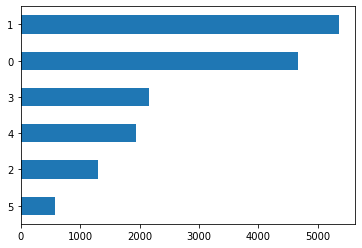

In [100]:
import matplotlib.pyplot as plt

df["label"].value_counts(ascending=True).plot.barh()
plt.show()

Let's show how we can use a tokenizer to conver the first 5 samples in the training dataset to sequences of tokens. 

In [110]:
emotions.set_format(type=None)

training_semples_5 = emotions["train"][:5]
training_semples_5

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

Let's get only the text data, and not the labels. 

In [111]:
text_training_5 = training_semples_5['text']
text_training_5

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

Apply the tokenizer, and dislply the sequence of tokens. 

In [109]:
output_tokens_5 = tokenizer(text_5, padding=True)

print("Input IDs")
for item in output_tokens_5.input_ids:
    print(item)

print("Attention Mask")
for item in output_tokens_5.attention_mask:
    print(item)

Input IDs
[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]
[101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 2113, 2008, 2009, 2003, 2145, 2006, 1996, 3200, 102, 0]
[101, 1045, 2572, 3110, 24665, 7140, 11714, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


work in progress ....

<a name='section10'></a>

# References

1. Hugging Face Course, available at [https://huggingface.co/course/chapter1/1](https://huggingface.co/course/chapter1/1).
2. Getting Started with Hugging Face Transformers for NLP, Exxact Blog, available at [https://www.exxactcorp.com/blog/Deep-Learning/getting-started-hugging-face-transformers](https://www.exxactcorp.com/blog/Deep-Learning/getting-started-hugging-face-transformers).
3. An Introduction to Using Transformers and Hugging Face, Zoumana Kelta, available at [https://www.datacamp.com/tutorial/an-introduction-to-using-transformers-and-hugging-face](https://www.datacamp.com/tutorial/an-introduction-to-using-transformers-and-hugging-face).
4. Applications of Deep Neural Networks, Course at Washington University in St. Louis, Jeff Heaton, available at [https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_11_01_huggingface.ipynb](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_11_01_huggingface.ipynb).

[BACK TO TOP](#section0)